<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [24]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [25]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


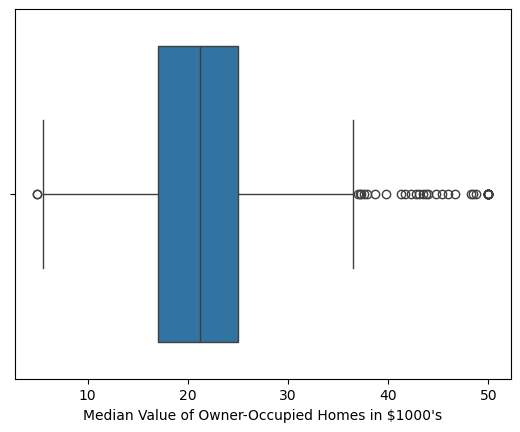

In [26]:
ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.xlabel('Median Value of Owner-Occupied Homes in $1000\'s')
pyplot.show()

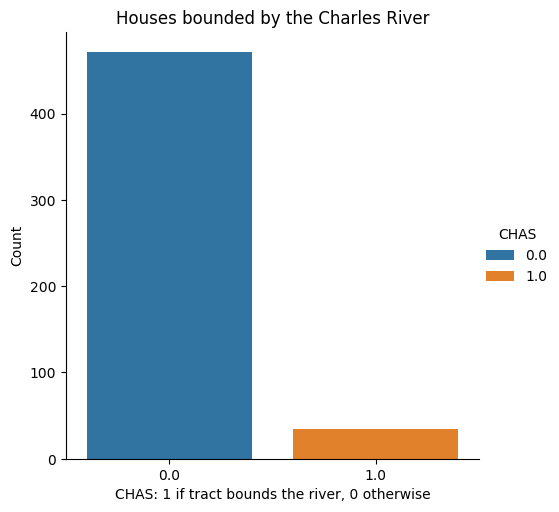

In [27]:
# Create a categorical plot (catplot) for the 'chas' variable using 'hue' to differentiate the colors
sns.catplot(x='CHAS', kind='count', hue = 'CHAS', data=boston_df)
# Set the title and labels for the axes using pyplot
pyplot.title('Houses bounded by the Charles River')
pyplot.xlabel('CHAS: 1 if tract bounds the river, 0 otherwise')
pyplot.ylabel('Count')

# Show the plot
pyplot.show()

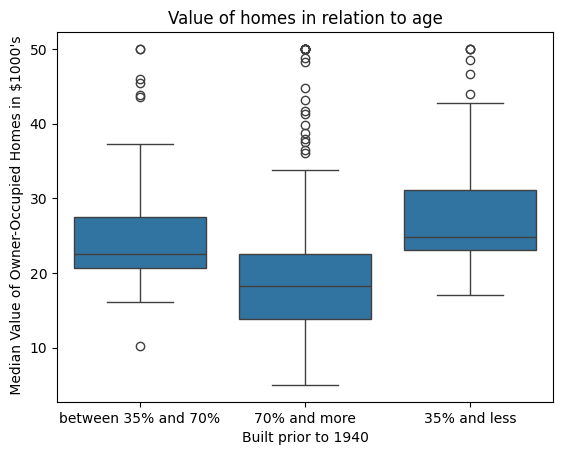

In [28]:
boston_df.loc[(boston_df['AGE']<=35), 'age group'] = '35% and less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age group'] = 'between 35% and 70%'
boston_df.loc[(boston_df['AGE']>=70), 'age group'] = '70% and more'
ax = sns.boxplot(x='age group', y='MEDV', data=boston_df)

# Set the title and labels using pyplot
pyplot.title('Value of homes in relation to age')
pyplot.xlabel('Built prior to 1940')
pyplot.ylabel(' Median Value of Owner-Occupied Homes in $1000\'s')

# Show the plot
pyplot.show()

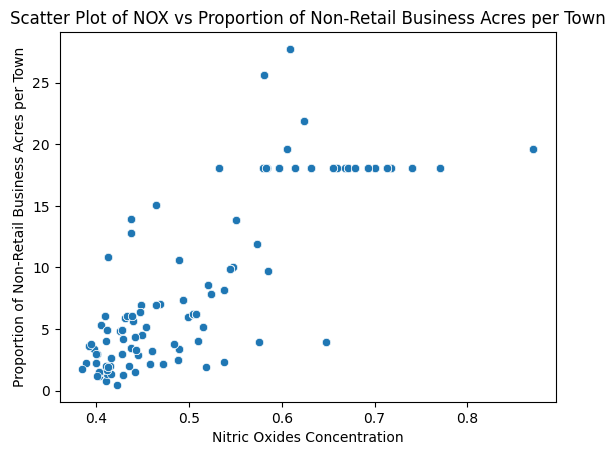

In [29]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Set the title and labels using pyplot
pyplot.title('Scatter Plot of NOX vs Proportion of Non-Retail Business Acres per Town')
pyplot.xlabel('Nitric Oxides Concentration')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town')

# Show the plot
pyplot.show()

It is overall a linear relationship as Noxconcentration increases we see a higher proportion of non retail business acres

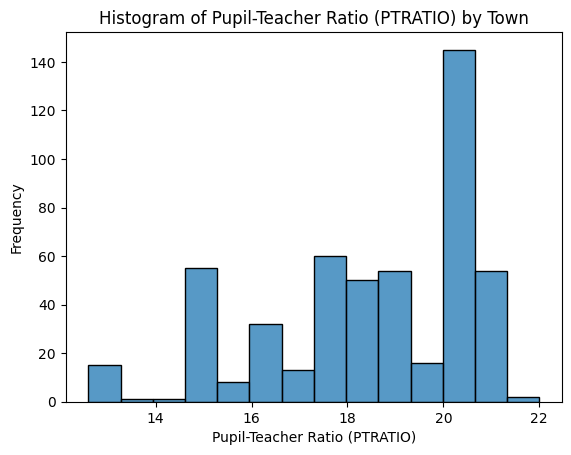

In [30]:
ax = sns.histplot(boston_df['PTRATIO'])

# Set the title and labels using pyplot
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO) by Town')
pyplot.xlabel('Pupil-Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()


In [37]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Null Hypothesis (H₀): There is no significant difference in the median house values between houses bounded by the Charles River and those not bounded by the river.
 
Alternative Hypothesis (H₁): There is a significant difference in the median house values between houses bounded by the Charles River and those not bounded by the river.

Conclusion: There is a statistically significant difference in the median house values between houses bounded by the Charles River and those not bounded by the river

In [41]:
thirtyfive_lower = boston_df[boston_df['age group'] == '35% and less']['MEDV']
thirtyfive_seventy= boston_df[boston_df['age group']== 'between 35% and 70%']['MEDV']
seventy_older= boston_df[boston_df['age group']== '70% and more']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy , seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Null Hypothesis (H₀): There is no significant difference in the median values of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).

Alternative Hypothesis (H₁): At least one of the median values (MEDV) for the different proportions of owner-occupied units built prior to 1940 (AGE) is different.

Conclusion: There is a statistically significant difference in the median values of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).

In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Null Hypothesis (H₀): There is no linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

Alternative Hypothesis (H₁): There is a linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

Conclusion: There is a significant linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town. The positive correlation coefficient (0.7637) suggests a strong positive relationship, meaning that as one variable increases, the other tends to increase as well.

In [54]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        13:04:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""